# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
url = "https://raw.githubusercontent.com/pkk111/A-Z-Machine-Learning-Udamey/main/Machine%20Learning%20A-Z%20(Codes%20and%20Datasets)-20211027T150542Z-001/Machine%20Learning%20A-Z%20(Codes%20and%20Datasets)/Part%206%20-%20Reinforcement%20Learning/Section%2033%20-%20Thompson%20Sampling/Python/Ads_CTR_Optimisation.csv"
dataset = pd.read_csv(url)

## Implementing Thompson Sampling

In [15]:
import random
N = 10000
d = 10
ads_selected = []
number_of_rewards_0 = [0] * d
number_of_rewards_1 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  total_reward += reward

## Visualising the results - Histogram

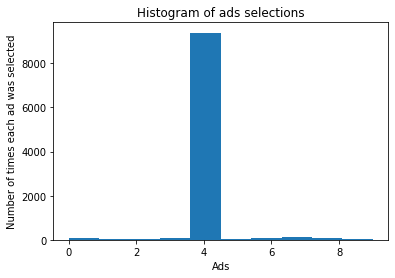

In [16]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()